In [40]:
from pitchdetect import *

data = detect_pitch("example.wav") # (frame, pitch, confidence)
data

[(0, 0.0, 1.0),
 (256, 0.0, 0.0),
 (512, 0.0, 0.0),
 (768, 0.0, 0.0),
 (1024, 0.0, 0.0),
 (1280, 0.0, 0.0),
 (1536, 0.0, 0.0),
 (1792, 0.0, 0.0),
 (2048, 0.0, 0.0),
 (2304, 4399.101, 0.3456234931945801),
 (2560, 4491.52, 0.3302818536758423),
 (2816, 419.7682, 0.2610013484954834),
 (3072, 335.88208, 0.06669986248016357),
 (3328, 334.84952, 0.13693666458129883),
 (3584, 348.6375, -0.0728297233581543),
 (3840, 351.45428, -0.06493961811065674),
 (4096, 622.2907, -0.19546854496002197),
 (4352, 346.4737, -0.2344508171081543),
 (4608, 1047.4447, -0.05916452407836914),
 (4864, 1043.2053, -0.043581247329711914),
 (5120, 1023.40485, -0.06695783138275146),
 (5376, 344.14343, -0.03332793712615967),
 (5632, 344.83475, -0.1453874111175537),
 (5888, 346.3731, -0.16321337223052979),
 (6144, 348.68817, -0.2473965883255005),
 (6400, 347.03647, -0.1820075511932373),
 (6656, 348.26767, -0.13255393505096436),
 (6912, 349.27844, -0.022800445556640625),
 (7168, 350.133, 0.05633574724197388),
 (7424, 347.8313

In [41]:
cleaned = remove_outliers([item[1] for item in data[100:600] if item[1] != 0.0])
cleaned

[345.8533630371094,
 347.38543701171875,
 347.01031494140625,
 347.8831787109375,
 347.12261962890625,
 346.2934265136719,
 346.7825927734375,
 347.3397216796875,
 347.69970703125,
 347.0010986328125,
 346.9388732910156,
 347.81964111328125,
 348.6546325683594,
 348.7289123535156,
 348.2119140625,
 348.31207275390625,
 348.9462890625,
 347.3268737792969,
 349.5356140136719,
 348.42547607421875,
 347.7991027832031,
 346.3839111328125,
 347.56298828125,
 348.04266357421875,
 348.4754638671875,
 348.4897766113281,
 348.18182373046875,
 349.0453186035156,
 348.6501770019531,
 348.34503173828125,
 347.4085388183594,
 347.7772216796875,
 347.6976318359375,
 347.72161865234375,
 346.6846008300781,
 346.22625732421875,
 347.260009765625,
 346.9646911621094,
 346.8435363769531,
 348.6773376464844,
 347.50555419921875,
 346.65911865234375,
 347.2496643066406,
 346.6606750488281,
 347.1156921386719,
 347.93634033203125,
 346.8178405761719,
 347.3258361816406,
 348.216796875,
 347.4091796875,
 345

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

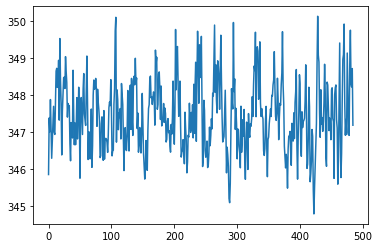

In [48]:
plt.plot(cleaned)

(array([0.01926306, 0.        , 0.01926306, 0.01926306, 0.        ,
        0.        , 0.05778919, 0.03852613, 0.09631532, 0.07705226,
        0.07705226, 0.21189371, 0.11557839, 0.23115677, 0.23115677,
        0.34673516, 0.19263064, 0.23115677, 0.50083967, 0.40452435,
        0.40452435, 0.46231354, 0.30820903, 0.50083967, 0.50083967,
        0.30820903, 0.36599822, 0.40452435, 0.36599822, 0.25041984,
        0.23115677, 0.38526129, 0.34673516, 0.23115677, 0.2696829 ,
        0.11557839, 0.13484145, 0.13484145, 0.09631532, 0.13484145,
        0.05778919, 0.09631532, 0.05778919, 0.03852613, 0.03852613,
        0.03852613, 0.09631532, 0.01926306, 0.03852613, 0.03852613]),
 array([344.78720093, 344.89423767, 345.00127441, 345.10831116,
        345.2153479 , 345.32238464, 345.42942139, 345.53645813,
        345.64349487, 345.75053162, 345.85756836, 345.9646051 ,
        346.07164185, 346.17867859, 346.28571533, 346.39275208,
        346.49978882, 346.60682556, 346.7138623 , 346.82089905

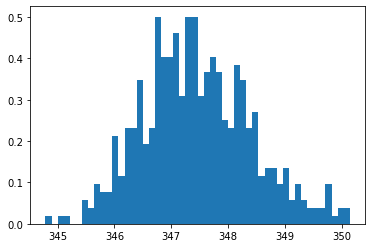

In [49]:
plt.hist(cleaned, density=True, bins=50)

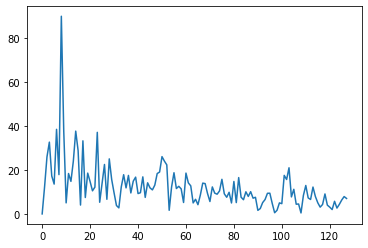

In [51]:
import numpy as np

base_idx = 200
length = 256
chunk = cleaned[base_idx:base_idx + length]
chunk -= np.mean(chunk)

plt.plot(np.abs(np.fft.fft(chunk)[:length//2]))